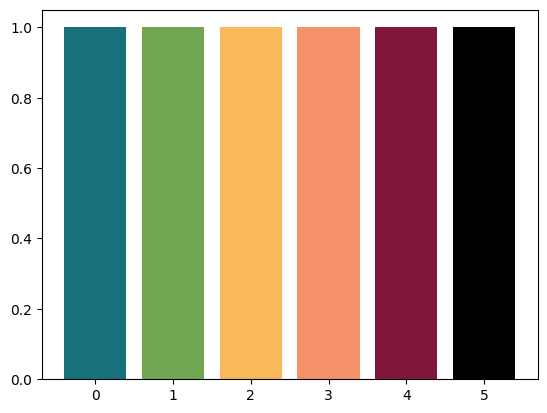

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.interpolate import interp1d

%matplotlib inline

bohr_magneton = 93.4376

# cls = ['#17707B','#70A551','#F9B859','#F6926A','#80173A']
cls = ['#17707B','#70A551','#F9B859','#F6926A','#80173A', '#000000']
plt.bar(range(len(cls)), [1]*len(cls), color=cls)
plt.show()

In [2]:
def load_constraint(filelist):
    mlist, dlist = np.empty(0),np.empty(0)
    for file in filelist:
        md = np.loadtxt('ConstraintFiles/'+file)
        m,d = md[:,0],md[:,1]
        mlist = np.append(mlist,m)
        dlist = np.append(dlist,d)
    return mlist,dlist

In [3]:
constraints,labels,label_position,label_angle,projected,colors = {},{},{},{},{},{}
label_position_dtau = {}
label_angle_dtau = {}
dist = {}

# SBND
constraints['SBND'] = load_constraint(['SBND.txt'])
labels['SBND'] = 'SBND'
label_position['SBND'] = (260,1.6e-7)
label_angle['SBND'] = 20
projected['SBND'] = True

# SHiP_Main
constraints['SHiP_Main'] = load_constraint(['SHiP_Main.txt'])
labels['SHiP_Main'] = 'SHiP Main Det.'
label_position['SHiP_Main'] = (150,3.4e-8)
label_angle['SHiP_Main'] = -23
projected['SHiP_Main'] = True

# NOMAD
constraints['NOMAD'] = load_constraint(['NOMAD.txt'])
constraints['NOMAD'] = ((constraints['NOMAD'])[0],np.sqrt(2)*(constraints['NOMAD'])[1])
# constraints['NOMAD'] = ((constraints['NOMAD'])[0],(constraints['NOMAD'])[1]/bohr_magneton)
labels['NOMAD'] = 'NOMAD'
label_position['NOMAD'] = (200,1.9e-6)
label_angle['NOMAD'] = -35
projected['NOMAD'] = False

# CHARM
constraints['CHARM'] = load_constraint(['CHARM.txt'])
constraints['CHARM'] = (1000*(constraints['CHARM'])[0],bohr_magneton*(constraints['CHARM'])[1])
labels['CHARM'] = 'CHARM-II'
label_position['CHARM'] = (14,2.3e-7)
label_angle['CHARM'] = 0
projected['CHARM'] = False

# SK
constraints['SK'] = load_constraint(['Gustafson_SK.dat'])
midpoint = 20
sortidx_1 = np.argsort((constraints['SK'])[0][:midpoint])
sortidx_2 = midpoint+np.argsort((constraints['SK'])[1][midpoint:])
sortidx = np.append(sortidx_1,sortidx_2)
constraints['SK'] = (1000*(constraints['SK'])[0][sortidx],1000*(constraints['SK'])[1][sortidx])
labels['SK'] = 'SuperK'
label_position['SK'] = (55,6e-7)
label_angle['SK'] = 60
projected['SK'] = False

# SN1987A
constraints['SN1987A'] = load_constraint(['SN1987A.txt'])
labels['SN1987A'] = 'SN1987A'
label_position['SN1987A'] = (12,4.5e-8)
label_angle['SN1987A'] = 0
projected['SN1987A'] = False

# LSND
constraints['LSND'] = load_constraint(['LSND.txt'])
labels['LSND'] = 'LSND'
label_position['LSND'] = (40,5e-6)
label_angle['LSND'] = 0
projected['LSND'] = False

# Borexino
constraints['Borexino'] = load_constraint(['Plestid_borexino.dat'])
constraints['Borexino'] = (1000*(constraints['Borexino'])[0],1000*(constraints['Borexino'])[1])
labels['Borexino'] = 'Borexino'
label_position['Borexino'] = (12,0.8e-7)
label_position_dtau['Borexino'] = (12,0.8e-7)
label_angle['Borexino'] = 85
label_angle_dtau['Borexino'] = 85
projected['Borexino'] = False

# MINERvA
constraints['MINERvA'] = load_constraint(['MINERvA.txt'])
labels['MINERvA'] = r'MINER$\nu$A'
label_position['MINERvA'] = (445,2.2e-6)
label_angle['MINERvA'] = 70
projected['MINERvA'] = False

# MB-angle
constraints['MB_angle_1'] = load_constraint(['MiniBooNE/CosTheta_0.950_CL_Path0.txt'])
labels['MB_angle_1'] = r'MiniBooNE $\cos \theta$'
label_position['MB_angle_1'] = (12,4e-6)
label_angle['MB_angle_1'] = 0
projected['MB_angle_1'] = False
colors['MB_angle_1'] = cls[2]

# MB-energy
constraints['MB_energy'] = load_constraint(['MiniBooNE/EnuQE_0.950_CL_Path0.txt'])
labels['MB_energy'] = r'MiniBooNE $E_\nu^{\rm QE}$'
label_position['MB_energy'] = (12,3e-6)
label_angle['MB_energy'] = 0
projected['MB_energy'] = False
colors['MB_energy'] = cls[0]

constraints['ND280'] = load_constraint(['t2k_new.txt'])
labels['ND280'] = r'T2K 2019'
label_position['ND280'] = (280,1.2e-7)
label_angle['ND280'] = 0
colors['ND280'] = cls[4]
projected['ND280'] = False

constraints['ND280upgrd'] = load_constraint(['t2kfullnII_new.txt'])
labels['ND280upgrd'] = r'T2K + T2KII'
label_position['ND280upgrd'] = (700,1.2e-7)
label_angle['ND280upgrd'] = 0
colors['ND280upgrd'] = cls[4]
projected['ND280upgrd'] = False

constraints['ND280_full'] = load_constraint(['t2kfull_new.txt'])
labels['ND280_full'] = r'T2K Full'
label_position['ND280_full'] = (700,1.2e-7)
label_angle['ND280_full'] = 0
colors['ND280_full'] = cls[4]
projected['ND280_full'] = False

constraints['ND280_5sigma'] = load_constraint(['t2k5sigma.txt'])
labels['ND280_5sigma'] = r'T2K + T2KII ($5\sigma$ C.L.)'
label_position['ND280_5sigma'] = (700,1.2e-7)
label_angle['ND280_5sigma'] = 0
colors['ND280_5sigma'] = cls[4]
projected['ND280_5sigma'] = False

constraints['ND280_DOWN'] = load_constraint(['t2k_new_DOWN.txt'])
labels['ND280_DOWN'] = None
label_position['ND280_DOWN'] = (280,1.2e-7)
label_angle['ND280_DOWN'] = 0
colors['ND280_DOWN'] = cls[4]
projected['ND280_DOWN'] = False

constraints['ND280upgrd_DOWN'] = load_constraint(['t2kfullnII_new_DOWN.txt'])
labels['ND280upgrd_DOWN'] = None
label_position['ND280upgrd_DOWN'] = (700,1.2e-7)
label_angle['ND280upgrd_DOWN'] = 0
colors['ND280upgrd_DOWN'] = cls[4]
projected['ND280upgrd_DOWN'] = False

constraints['ND280_5sigma_DOWN'] = load_constraint(['t2k5sigma_DOWN.txt'])
labels['ND280_5sigma_DOWN'] = None
label_position['ND280_5sigma_DOWN'] = (700,1.2e-7)
label_angle['ND280_5sigma_DOWN'] = 0
colors['ND280_5sigma_DOWN'] = cls[4]
projected['ND280_5sigma_DOWN'] = False

constraints['ND280_UP'] = load_constraint(['t2k_new_UP.txt'])
labels['ND280_UP'] = None
label_position['ND280_UP'] = (280,1.2e-7)
label_angle['ND280_UP'] = 0
colors['ND280_UP'] = cls[4]
projected['ND280_UP'] = False

constraints['ND280upgrd_UP'] = load_constraint(['t2kfullnII_new_UP.txt'])
labels['ND280upgrd_UP'] = None
label_position['ND280upgrd_UP'] = (700,1.2e-7)
label_angle['ND280upgrd_UP'] = 0
colors['ND280upgrd_UP'] = cls[4]
projected['ND280upgrd_UP'] = False

constraints['ND280_5sigma_UP'] = load_constraint(['t2k5sigma_UP.txt'])
labels['ND280_5sigma_UP'] = None
label_position['ND280_5sigma_UP'] = (700,1.2e-7)
label_angle['ND280_5sigma_UP'] = 0
colors['ND280_5sigma_UP'] = cls[4]
projected['ND280_5sigma_UP'] = False



<>:84: SyntaxWarning: invalid escape sequence '\s'
<>:84: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2846186/1274867594.py:84: SyntaxWarning: invalid escape sequence '\s'
  plt.text(510, 1.4e-6, '$\star$', color='black', fontsize=20)


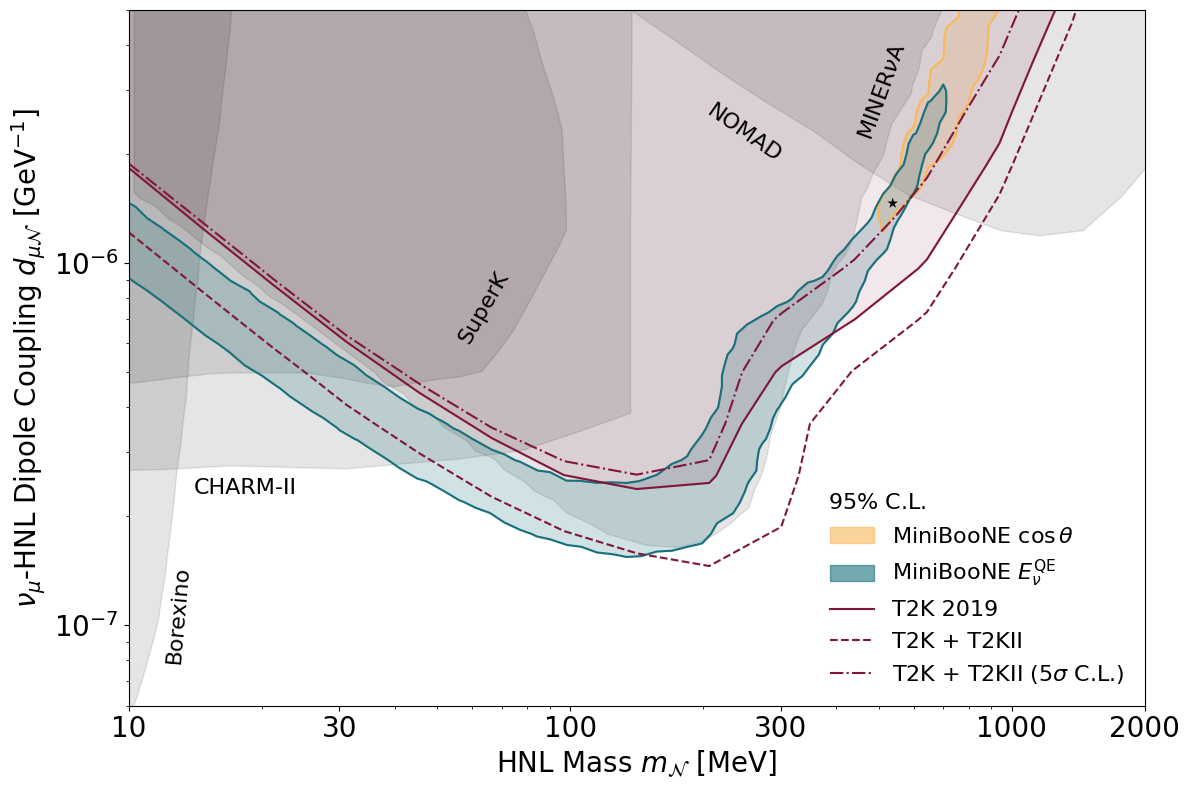

In [5]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from labellines import labelLine, labelLines

def setup_plot():
    """Initialize the plot with basic settings."""
    fig = plt.figure(figsize=(12, 8))
    plt.loglog()
    plt.xlim(1e1, 2e3)
    plt.ylim(6e-8, 5e-6)
    
    # Set labels and ticks
    plt.xlabel(r'HNL Mass $m_\mathcal{N}$ [MeV]', fontsize=20)
    plt.ylabel(r'$\nu_\mu$-HNL Dipole Coupling $d_{\mu\mathcal{N}}$ [GeV$^{-1}$]', fontsize=20)
    custom_ticks = [10, 30, 100, 300, 1000, 2000]
    plt.xticks(custom_ticks, [str(x) for x in custom_ticks], fontsize=20)
    plt.yticks(fontsize=20)
    
    return fig

def plot_nd280_constraints(con_m, con_d, exp_key, labels, legend_handles,with_error=False):
    """Handle different types of ND280 constraints."""
    if exp_key == 'ND280upgrd':
        line, = plt.plot(con_m, con_d, alpha=1, linestyle='dashed', color=cls[4])
        legend_handles[exp_key] = line
    elif exp_key in ['ND280_full','ND280+']:
        line, = plt.plot(con_m, con_d, alpha=1, linestyle='dashed', color=cls[4])
    elif exp_key in ['ND280_5sigma']:
        line, = plt.plot(con_m, con_d, alpha=1, linestyle='dashdot', color=cls[4])
        legend_handles[exp_key] = line
    elif exp_key == 'ND280':
        line, = plt.plot(con_m, con_d, alpha=1, linestyle='solid', color=cls[4])
        # labelLine(line, x=370, label='T2K', ha='left', va='bottom', color=cls[4], fontsize=20, backgroundcolor='none')
        plt.fill_between(con_m, con_d, 1e-5, alpha=0.1, color=cls[4])
        legend_handles[exp_key] = line
    elif 'UP' in exp_key and with_error:
        down_key = exp_key.replace('UP','DOWN')
        interp_y2 = interp1d(constraints[down_key][0], constraints[down_key][1], kind='linear', bounds_error=False, fill_value="extrapolate")
        plt.fill_between(con_m, con_d, interp_y2(con_m), alpha=0.2, color=cls[4])
        

def plot_sigma_constraints(con_m, con_d, exp_key, legend_handles):
    """Handle 5-sigma constraints."""
    if exp_key == 'ND2805sigma':
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='dashdotted', color='black')
        legend_handles[exp_key] = line
    elif exp_key == 'ND280+5sigma':
        line, = plt.plot(con_m, con_d, alpha=0.8, linestyle='dashdotted', color='black')
        legend_handles[exp_key] = line

def plot_mb_constraints(con_m, con_d, exp_key, colors, legend_handles):
    """Handle MiniBooNE constraints."""
    color = colors[exp_key]
    plt.plot(con_m, con_d, alpha=1, linestyle='solid', color=color)
    fill = plt.fill_between(con_m, con_d, 1e-5, alpha=0.2, color=color)
    legend_handles[exp_key] = Patch(facecolor=color, edgecolor=color, alpha=0.6)

def plot_other_constraints(con_m, con_d, exp_key, colors, labels, 
                         label_position, label_angle, legend_handles, sfgd=False):
    """Handle all other constraints."""
    if exp_key in ['sfgd','t2kfull+sfgd']:
        if sfgd:
            line, = plt.plot(con_m, con_d, alpha=1, linestyle='dashed', color=cls[1])
            legend_handles[exp_key] = line
    else:
        color = colors.get(exp_key, 'black')
        # plt.plot(con_m, con_d, alpha=0.3, linestyle='solid', color=color)
        fill = plt.fill_between(con_m, con_d, 1e-5, alpha=0.1, color=color)

        legend_handles[exp_key] = Patch(facecolor=color, edgecolor=color, alpha=0.1)

def add_legend(legend_handles, legend_keys, labels):
    """Add legend to the plot."""
    legend_items = [legend_handles[key] for key in legend_keys if key in legend_handles]
    legend_labels = [labels[key] for key in legend_keys if key in legend_handles]
    
    plt.legend(handles=legend_items,
              labels=legend_labels,
              loc='lower right',
              fontsize=16,
              ncol=1,
              framealpha=0)
    plt.text(510, 1.4e-6, '$\star$', color='black', fontsize=20)

def plot_constraints(constraints, projected, labels, colors, 
                    label_position, label_angle, sfgd=False, scatter=None, with_error=False):
    """Main function to plot all constraints."""
    dtau_keys = ['MINERvA_dtau', 'MB_energy_dtau', 'MB_angle', 'LSND', 'SBND', 
                 'SHiP_Main', 'SN1987A','t2kfull+sfgd','sfgd','ND280_full','ND280+','ND280_DOWN','ND280upgrd_DOWN','ND280_5sigma_DOWN','ND280_UP','ND280upgrd_UP','ND280_5sigma_UP']
    legend_keys = ['MB_angle_1', 'MB_energy', 'ND280', 'ND280upgrd','t2kfull', 'ND280_5sigma']
    
    fig = setup_plot()
    legend_handles = {}
    
    for exp_key, (con_m, con_d) in constraints.items():
        if exp_key in dtau_keys or projected[exp_key]:
            continue
            
        if 'ND280' in exp_key:
            plot_nd280_constraints(con_m, con_d, exp_key, labels, legend_handles, with_error=with_error)
        elif exp_key in ['MB_angle_1', 'MB_energy']:
            plot_mb_constraints(con_m, con_d, exp_key, colors, legend_handles)
        else:
            plot_other_constraints(con_m, con_d, exp_key, colors, labels, 
                                 label_position, label_angle, legend_handles, sfgd=sfgd)
        
        if exp_key not in legend_keys:
            plt.text(*label_position[exp_key], labels[exp_key], 
                    rotation=label_angle[exp_key], color='black', fontsize=16)
            
    # plt.text(330,2E-7, 'T2K+T2KII', rotation=75, color=cls[4], fontsize=16)
    # plt.text(150,3E-7, 'T2K 2019', rotation=70, color=cls[4], fontsize=16)
    # plt.text(340,2.2E-7, 'T2K 2023', rotation=74, color=cls[4], fontsize=16)
    plt.text(370,2.1E-7, r' 95$\%$ C.L.', rotation=0, color=cls[5], fontsize=16)

    if scatter is not None:
        n_m = 10
        n_mu = 10
        m_sample = np.geomspace(1e-2,2,n_m)
        mu_sample = np.geomspace(1e-7,1e-5,n_mu)
        m_sample, mu_sample = np.meshgrid(m_sample, mu_sample)
        m_sample = np.reshape(m_sample,[n_m*n_mu])
        mu_sample = np.reshape(mu_sample,[n_m*n_mu])
        
        plt.scatter(m_sample[scatter]*1000,mu_sample[scatter]/2, s=200, c=['red','blue','green'])
    
    m = np.linspace(10,2000,100)
    # plt.plot(m,m/1000*1.166e-5/(4*np.sqrt(3)*np.pi),color=cls[0],linestyle='solid')
    # plt.text(450,2e-7,r'$G_F m_\mathcal{N}/(4\sqrt{3}\pi))$', rotation=47, fontsize=16,color=cls[0])
    add_legend(legend_handles, legend_keys, labels)
    plt.tight_layout()
    return fig

sfgd=True

# Usage
fig = plot_constraints(constraints, projected, labels, colors, 
                      label_position, label_angle, sfgd, with_error=True)

plt.savefig('GlobalConstraints.pdf', dpi=200)
plt.show()

In [8]:
m = np.linspace(10,2000,100)/1000
m*1.166e-5/(4*np.sqrt(3)*np.pi)

array([5.35707910e-09, 1.61253492e-08, 2.68936193e-08, 3.76618894e-08,
       4.84301595e-08, 5.91984297e-08, 6.99666998e-08, 8.07349699e-08,
       9.15032400e-08, 1.02271510e-07, 1.13039780e-07, 1.23808050e-07,
       1.34576320e-07, 1.45344591e-07, 1.56112861e-07, 1.66881131e-07,
       1.77649401e-07, 1.88417671e-07, 1.99185941e-07, 2.09954211e-07,
       2.20722481e-07, 2.31490751e-07, 2.42259022e-07, 2.53027292e-07,
       2.63795562e-07, 2.74563832e-07, 2.85332102e-07, 2.96100372e-07,
       3.06868642e-07, 3.17636912e-07, 3.28405182e-07, 3.39173453e-07,
       3.49941723e-07, 3.60709993e-07, 3.71478263e-07, 3.82246533e-07,
       3.93014803e-07, 4.03783073e-07, 4.14551343e-07, 4.25319613e-07,
       4.36087884e-07, 4.46856154e-07, 4.57624424e-07, 4.68392694e-07,
       4.79160964e-07, 4.89929234e-07, 5.00697504e-07, 5.11465774e-07,
       5.22234044e-07, 5.33002315e-07, 5.43770585e-07, 5.54538855e-07,
       5.65307125e-07, 5.76075395e-07, 5.86843665e-07, 5.97611935e-07,
      

In [10]:
n_m = 10
n_mu = 10
m_sample = np.geomspace(1e-2,2,n_m)
mu_sample = np.geomspace(1e-7,1e-5,n_mu)
m_sample, mu_sample = np.meshgrid(m_sample, mu_sample)
m_sample = np.reshape(m_sample,[n_m*n_mu])
mu_sample = np.reshape(mu_sample,[n_m*n_mu])

m_sample[[10,30]]

array([0.01, 0.01])